/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-1-721d2f0c50ab>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("tab10", 10))


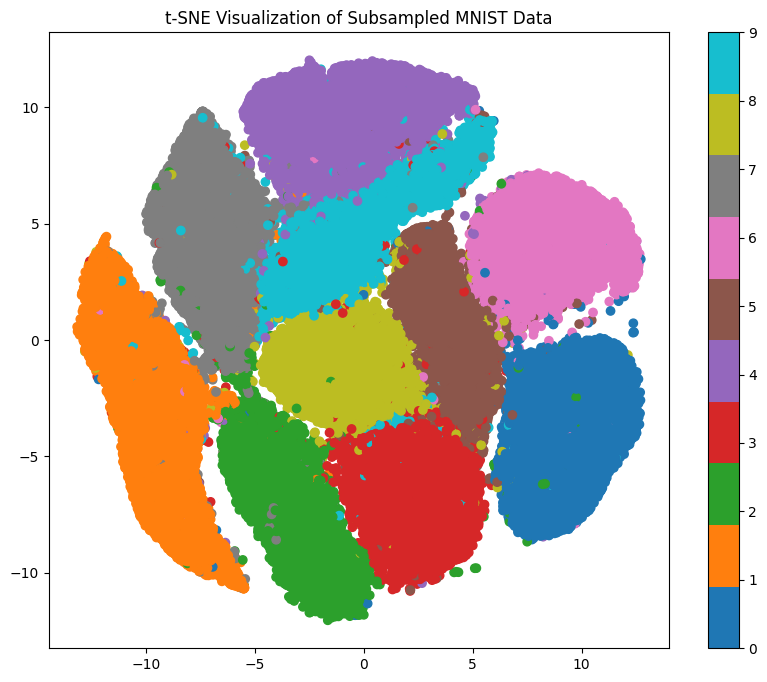

In [ ]:
# https://chat.openai.com/share/b449ecaa-893a-4471-ae48-45801a2c0668

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from skimage.transform import downscale_local_mean

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist.data.to_numpy().reshape(-1, 28, 28).astype(float) / 255.0  # Convert to NumPy array, reshape to 28x28, and normalize
y = mnist.target.to_numpy().astype(int)

# Subsample the images to 14x14 using downscale_local_mean
X_subsampled = np.array([downscale_local_mean(x, (2, 2), clip=False) for x in X])
X_subsampled = X_subsampled.reshape(X_subsampled.shape[0], -1)

# Define t-SNE parameters
n_components = 2  # Number of dimensions in the embedded space
perplexity = 30  # Controls balance between preserving local and global structure
n_iter = 300  # Number of iterations for optimization

# Perform t-SNE
tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=42)
X_tsne = tsne.fit_transform(X_subsampled)

# Create a scatter plot of the t-SNE embeddings with different colors for each digit class
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("tab10", 10))
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE Visualization of Subsampled MNIST Data")
plt.show()


<ipython-input-4-4028f9273026>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("tab10", 10),s=1)


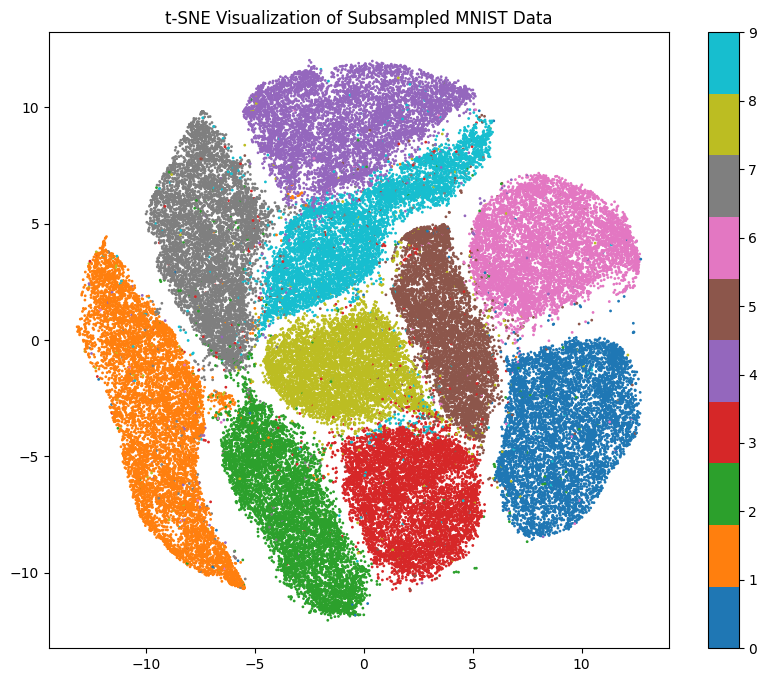

In [ ]:

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("tab10", 10),s=1)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE Visualization of Subsampled MNIST Data")
plt.show()